Import libraries and load csv file with ratings.

The ratings file is available from your IMDb user account.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ratings  =  pd.read_csv("ratings.csv")

Parsing data.

Basically, I shall count repetitions of an instance. 

I am interested only in my own ratings, IMDb ratings, release year, and genres.

Note that one movie can have more than one genre.

In [2]:
movie_idxs          = ratings.index[ratings['Title Type']=='movie'].tolist()

my_movie_ratings    = ratings.iloc[movie_idxs,1]
counted_ratings     = np.unique(my_movie_ratings, return_counts=True)

imdb_ratings        = ratings.iloc[movie_idxs,6]

my_movie_years      = ratings.iloc[movie_idxs,8]
counted_years       = np.unique(my_movie_years, return_counts=True)

my_movie_runtimes   = ratings.iloc[movie_idxs,7]
counted_runtimes    = np.unique(my_movie_runtimes, return_counts=True)

my_movie_genres_aux = ratings.iloc[movie_idxs,9].str.split(", ") # the space after the comma is important
my_movie_genres     = [item for sublist in my_movie_genres_aux for item in sublist]
counted_genres      = np.unique(my_movie_genres, return_counts=True)

Plotting the distribution of my ratings.

On top of each bar I indicate the total number of movies which I have given that score.

I guess I have not been watching too many masterpieces... 

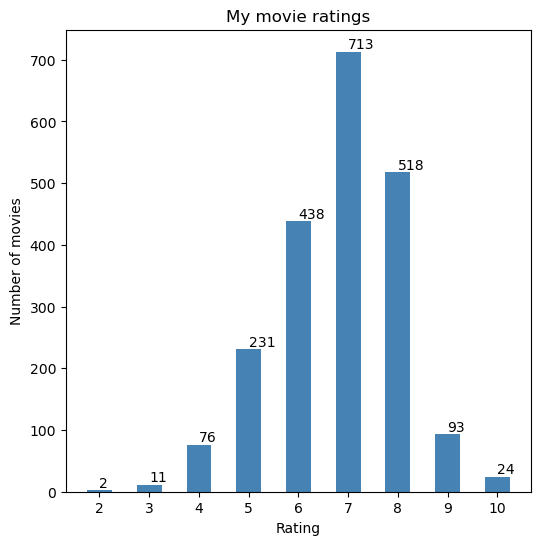

In [3]:
plt.figure(figsize=(6, 6))
plt.bar(counted_ratings[0], counted_ratings[1], color ='#4682B4', width = 0.5)
 
plt.xlabel("Rating")
plt.ylabel("Number of movies")
plt.title("My movie ratings")
plt.xticks(counted_ratings[0])

for i in range(len(counted_ratings[0])):
    plt.text(counted_ratings[0][i], counted_ratings[1][i] + 5,
             str(counted_ratings[1][i]))

plt.show()

Plotting information about the genres.

For the sake of visualization, I will group less watched genres into *Others* and limit the pie chart to eight wedges.

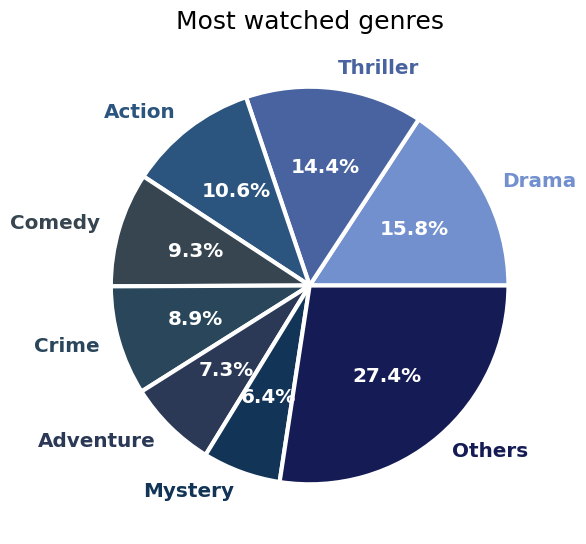

,Genre,Movies watched
#,,
8,Sci-Fi,372
9,Romance,268
10,Fantasy,262
11,Horror,254
12,Family,168
13,Biography,125
14,Animation,109
15,War,80
16,History,68


In [4]:
genres_dataframe = pd.DataFrame(
    data = {
        'Genre': counted_genres[0].tolist(),
        'value' : counted_genres[1].tolist()},
    ).sort_values('value', ascending = False)

# The top 7 most watched genres
genres_dataframe_most_watched = genres_dataframe[:7].copy()

# The remaining genres are summed up altogether
genres_dataframe_others = pd.DataFrame(data = {
    'Genre' : ['Others'],
    'value' : [genres_dataframe['value'][7:].sum()]
})

# Combine dataframes
genres_dataframe_compact = pd.concat([genres_dataframe_most_watched, genres_dataframe_others])

# I like blue :)
color_shades = ['#728FCE','#4863A0','#2B547E','#36454F', '#29465B','#2B3856','#123456', '#151B54']	

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    genres_dataframe_compact['value'], labels=genres_dataframe_compact['Genre'].tolist(), autopct='%.1f%%',
    colors=color_shades,
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large', 'fontweight': 'bold'})

# Set the corresponding text label color to the wedge's face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white')
plt.setp(texts, fontweight='bold')

ax.set_title('Most watched genres', fontsize=18)

plt.tight_layout()
plt.show()

genres_dataframe_less_watched = genres_dataframe[7:].copy()
genres_dataframe_less_watched.rename(columns = {'value':'Movies watched'}, inplace = True)
genres_dataframe_less_watched['#'] = [str(i + 8) for i in range(len(genres_dataframe_less_watched['Genre']))]
genres_dataframe_less_watched.set_index('#', inplace=True)
genres_dataframe_less_watched.style.set_table_styles(
    [
        {
            'selector': 'th',
            'props': [('background-color', '#D3D3D3')]
        },
        {
            'selector': 'tbody tr:nth-child(even)',
            'props': [('background-color', '#89CFF0')]
        }

    ]
)

As somewhat expected for someone born in 1990, I have been watching more movies from the recent period.

When we go to the cinema, we rarely attend sessions showing old classic movies.

Moreover, only a few classics stand the test of time.

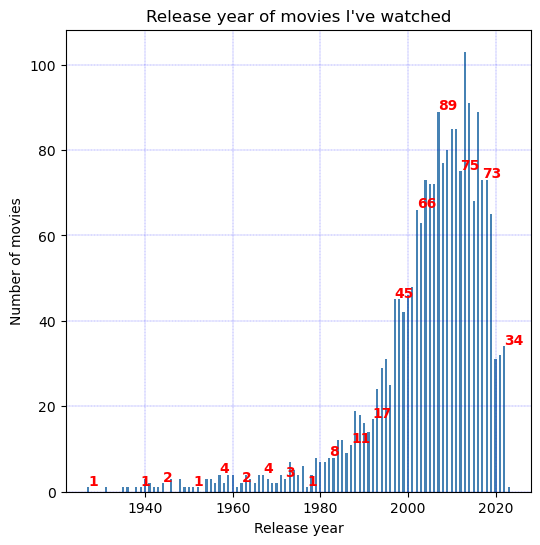

In [5]:
plt.figure(figsize=(6, 6))
plt.bar(counted_years[0], counted_years[1], color ='#4682B4', width = 0.5)
 
plt.xlabel("Release year")
plt.ylabel("Number of movies")
plt.title("Release year of movies I've watched")

for i in range(0, len(counted_years[0]),5):
    plt.text(counted_years[0][i], counted_years[1][i] + 0.5,
             str(counted_years[1][i]),color='red',fontweight='bold')
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.2)
plt.show()

Let us now take a look at the average ratings in function of release year.  

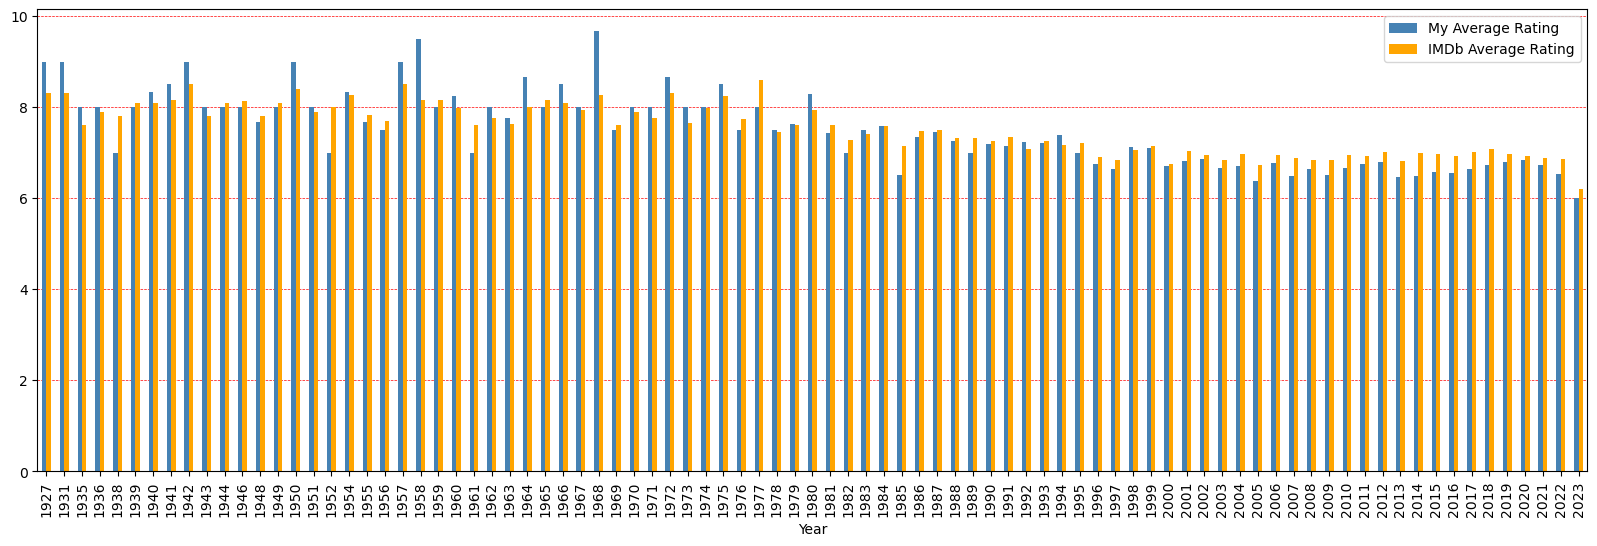

In [46]:
my_avg_rating   = np.empty([len(counted_years[0])]) # Empty array
imdb_avg_rating = np.empty([len(counted_years[0])]) # Empty array

for i in range(len(counted_years[0])):
    idxs = my_movie_years == counted_years[0][i]
    my_avg_rating[i]    = np.mean(my_movie_ratings[idxs])
    imdb_avg_rating[i]  = np.mean(imdb_ratings[idxs])

avg_ratings_df = pd.DataFrame({
    'Year': counted_years[0],
    'My Average Rating': my_avg_rating,
    'IMDb Average Rating': imdb_avg_rating
})
  
# plotting graph
ax = avg_ratings_df.plot(x="Year", y=["My Average Rating", "IMDb Average Rating"], kind="bar", figsize=(20, 6),
        subplots=False,
        grid=True,
        color={"My Average Rating": "#4682B4", "IMDb Average Rating": "#FFA500"})
ax.set_axisbelow(True)
ax.grid(color='r', linestyle='--', linewidth=0.5)
ax.grid(axis='x')


Charles Bukowski once said *The masses are always wrong - Wisdom is doing everything the crowd does not do.*

Let us see how I fit his description...

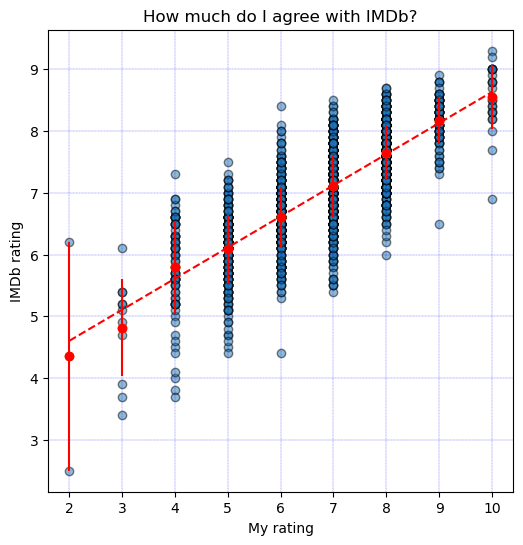

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(my_movie_ratings, imdb_ratings, alpha=0.5, edgecolors="k")
m, b = np.polyfit(my_movie_ratings, imdb_ratings, deg=1)

# Create a sequence of 50 points from 2 to 10 
sequence_x = np.linspace(counted_ratings[0][0], counted_ratings[0][-1], num=50)

# Plot regression line
plt.plot(sequence_x, b + m * sequence_x, color="r", linestyle = '--', lw=1.5)

mean_rating = np.empty([len(counted_ratings[0])]) # Empty array
std_rating  = np.empty([len(counted_ratings[0])]) # Empty array

for i in range(len(counted_ratings[0])):
    idxs = my_movie_ratings == counted_ratings[0][i]
    imdb_ratings_aux = imdb_ratings[idxs]
    mean_rating[i] = np.mean(imdb_ratings_aux)
    std_rating[i] = np.std(imdb_ratings_aux)

plt.scatter(counted_ratings[0], mean_rating, color="r",edgecolors="orange")
plt.errorbar(counted_ratings[0], mean_rating, std_rating, fmt="o", color="r")
plt.xlabel('My rating')
plt.ylabel('IMDb rating')
plt.title('How much do I agree with IMDb?')
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.2)
plt.show()